## Problem Set 5: Manasi Sanjay Kulkarni
### Collaborators: Pratik Damania, Aditya Wakade, Gaurav Gohil, Prem Shah

In [48]:
#importing all the necessary packages
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib
import sklearn

%matplotlib inline  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.cross_validation import train_test_split,cross_val_score

/Users/manasi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


I have loaded the initial data set and converted it to dataframe. Also given labels to the dataset.

In [489]:
#Loading the initial data and converting it to dataframe
from sklearn.datasets import load_boston
bdata=load_boston()
data=pd.DataFrame(bdata.data)
#target=pd.DataFrame(bdata.target)
#data=pd.concat((data,target),axis=1)
cols=bdata.feature_names
#cols=np.append(bdata.feature_names,'MEDV')
data.columns=cols

In [491]:
#Head of data
data1=data
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## 1.2 Adding engineered features

In [492]:
#Creating Engineered columns
data['ZN_SQ']=data['ZN']**2
data['CRIM_ZN']=data['CRIM']*data['ZN']
data['INDUS_CHAS']=data['INDUS']*data['CHAS']
data['DIS_SQ']=data['DIS']**2
data['RAD_SQ']=data['RAD']**2
data['DIS_RAD']=data['DIS']*data['RAD']
data['CRIM_SQ']=data['CRIM']**2
data['RM_SQ']=data['RM']**2
data['RM_RAD']=data['RM']*data['RAD']
data['LSTAT_SQ']=data['LSTAT']**2

## 1.3 Adding Bogus Features

In [493]:
#Adding random columns B1-B10
import random
cols=['B1','B2','B3','B4','B5','B6','B7','B8','B9','B10']
for i in cols:
    data[i]=random.sample(range(1,1000),506)
    
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,48,769,818,239,46,411,329,465,437,599
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,545,274,318,462,81,424,364,917,279,630
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,83,13,845,660,356,97,894,944,904,652
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,29,340,426,3,268,124,110,5,585,517
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,864,309,651,816,832,239,158,600,682,698


## Adding target column in the end

In [500]:
#Adding target in the end
target=pd.DataFrame(bdata.target)
data['MEDV']=target
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,B2,B3,B4,B5,B6,B7,B8,B9,B10,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,769,818,239,46,411,329,465,437,599,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,274,318,462,81,424,364,917,279,630,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,13,845,660,356,97,894,944,904,652,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,340,426,3,268,124,110,5,585,517,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,309,651,816,832,239,158,600,682,698,36.2


## 1.4 Creating summary statistics

There are no null values in any of the variables

In [60]:
#Creating summary statistic
summary=data.describe()

In [61]:
#Finding the missing values
missing=data.isnull().sum(axis=0)

In [62]:
summary.loc['null_values']=missing
summary

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,B4,B5,B6,B7,B8,B9,B10,RM_SQ,RM_RAD,LSTAT_SQ
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,...,498.079051,489.964427,502.867589,511.468379,507.547431,491.055336,490.154150,39.989325,58.733255,210.993989
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,...,289.663105,293.477327,280.253478,293.725190,286.998877,287.834277,288.814058,9.079531,52.720853,236.061920
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,...,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,1.000000,12.680721,5.706000,2.992900
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,...,256.500000,226.250000,270.250000,252.250000,269.250000,243.000000,230.500000,34.639111,23.854000,48.303700
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,...,498.000000,493.500000,496.000000,512.500000,506.000000,491.500000,480.500000,38.545473,31.567500,129.050000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,...,738.500000,734.750000,742.750000,762.500000,741.250000,735.750000,742.500000,43.870759,107.550000,287.472100
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,...,999.000000,999.000000,998.000000,999.000000,998.000000,999.000000,994.000000,77.088400,210.720000,1441.720900
null_values,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## 1.5 Graphical Exploration

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c18d0c3c8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c19d68ef0>]], dtype=object)

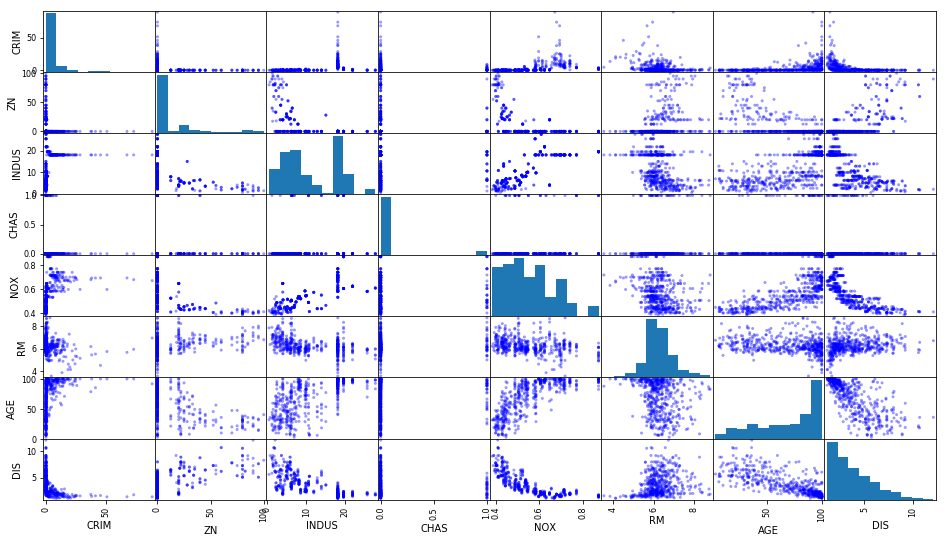

In [11]:
#Making a coorelation matrix. Adding some relevant features and some irrelevant ones. 
#from pandas.tools.plotting import scatter_matrix
pd.plotting.scatter_matrix(data[data.columns[:8]],figsize=(16,9),c='blue',alpha=0.4)

In [33]:
#Computing the RMSE function:
#def compute_rmse(beta,x_test,y_pred):
    #eq=(np.transpose(y_pred-x_test*beta)*(y_pred-x_test*beta)).mean()
    #return eq


## 2.1 Loss Function

In [34]:
#Computing the RMSE function:
def compute_rmse(model,test_data,target_output):
    
    predicted = test_data@model.coef_ + model.intercept_
    difference = (target_output - predicted)
    difference_transpose = (target_output - predicted).T
    mse = np.dot(difference_transpose,difference).mean()/len(predicted)
    return mse

In [36]:
#Testing the function with random values of arrays
#compute_rmse(0.8,np.array([2, 2, 3]),np.array([0, 2, 6]))

## 2.2 A few simple regressions

In [136]:
def kfold_cross_val(data,model,folds):
    
    rows=len(data)
    #Setting the division
    set_rows=np.floor(rows/folds)
    #Randomness on data
    indexes=np.array(data.index)
    np.random.shuffle(indexes)
    
    #Empty list for Mean Squared Error
    mse=[]
    
    #Iterating through the folds
    for i in range(0,folds):
        start_index=int(i*set_rows)
        end_index=int(start_index+set_rows)
    
    #Dividing the data into test and train data
        test_indexes=indexes[start_index:end_index]
        test_data=data.ix[test_indexes,:]
        train_data=data.ix[~data.index.isin(test_indexes)]
    
    #Seperating the target
        train_x = train_data.drop('MEDV',axis=1)
        train_y=train_data['MEDV']
        test_x = test_data.drop('MEDV', axis=1)
        test_y=test_data['MEDV']

    #Fitting it on the model as specified by the user in the function arguements
        model.fit(train_x,train_y)
    #Predict
        pred=model.predict(test_x)
    #Calculating
        mse.append(compute_rmse(model,test_x,test_y))
    
    average_mse = np.mean(mse)
    return average_mse,mse

## 2.2.1 A small model including 1-2 variables 

I have chosen the INDUS and DIS columns assuming they are related to the Price column

In [137]:
columns = ['INDUS','DIS']
#Split the input data into training and testing
X_train, X_test, y_train, y_test = train_test_split (data[columns],bdata.target, train_size = 0.75)

#Check the shapes of the train and test data
#print(np.shape(X_train))
#print(np.shape(y_train))
#print(np.shape(X_test))
#print(np.shape(y_test))

### Model Fit

In [138]:
#Fitting a model to pass it through the function
model = LinearRegression(n_jobs=10,normalize=True)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
coefficients = model.coef_

### RMSE and Accuracy of the model

In [139]:
#Comparing the values with the in built function
print(compute_rmse(model,X_test,y_test))
print(mean_squared_error(predictions,y_test))
print('The accuracy of the model is', model.score(X_test,y_test))

69.1370101204
69.1370101204
The accuracy of the model is 0.159341867476


### Cross Validation of the model

In [140]:
#10-fold cross-validate this model to get the average MSE score (the value of your loss function).
average_mse,mse_all = kfold_cross_val(data,model,10)
count=1
for i in mse_all:
    print('For run',count, 'MSE is', i)
    count=count+1
print('The average MSE for 10 cross validation using the 2 feature model is',average_mse)



For run 1 MSE is 7.2128549461
For run 2 MSE is 22.1160171978
For run 3 MSE is 24.7363530034
For run 4 MSE is 46.8169174008
For run 5 MSE is 16.4157898094
For run 6 MSE is 13.5179776838
For run 7 MSE is 11.413260787
For run 8 MSE is 13.9662252069
For run 9 MSE is 10.0968337986
For run 10 MSE is 10.9364328625
The average MSE for 10 cross validation using the 2 feature model is 17.7228662696


## Full Model

In [151]:
#Now build the next model with 10 features. Add more features you consider relevant but also those
#you consider irrelevant. Compute 10-fold MSE for this model.

#X and Y data segregation
boston_data_wo_target=data.drop('MEDV', axis=1)
boston_data_only_target=data['MEDV']

In [152]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split (boston_data_wo_target,boston_data_only_target, train_size = 0.75)
#y_train

### Model Fitting

In [153]:
#Fitting a model to pass it through thr function
model = LinearRegression(n_jobs=10,normalize=True)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
coefficients = model.coef_

### RMSE and Accuracy of Full model

In [154]:
#Comparing the values with the in built function
print(compute_rmse(model,X_test,y_test))
print(mean_squared_error(predictions,y_test))
print('The accuracy of the model is', model.score(X_test,y_test))

19.2356207315
19.2356207315
The accuracy of the model is 0.76805760677


### Cross Validation of Full Model

In [155]:
#10-fold cross-validate this model to get the average MSE score (the value of your loss function).
average_mse,mse_all = kfold_cross_val(data,model,10)
count=1
for i in mse_all:
    print('For run',count, 'MSE is', i)
    count=count+1
print('The average MSE for 10 cross validation using the full feature model is',average_mse)

For run 1 MSE is 8.9894571415
For run 2 MSE is 10.2135855454
For run 3 MSE is 11.7088169509
For run 4 MSE is 15.1941544007
For run 5 MSE is 23.7681004735
For run 6 MSE is 15.1071859007
For run 7 MSE is 26.826414299
For run 8 MSE is 15.4138455706
For run 9 MSE is 15.0189340266
For run 10 MSE is 33.2457010562
The average MSE for 10 cross validation using the full feature model is 17.5486195365


### Which model is better?

Full model is better in terms of higher accuracy as well as lesser average Mean Squared Error

## 3. Finding the best model

### 3.1.1. Total number of features

The total number of features we have are 34. For a linear model, we need minimum of two features. So if the arrangement of features is considered, we would have 34!(factorial) ways to select features. However, the different arrangement of the same features would mean selecting the same model. 

In [156]:
#How many different linear regression models can you build based on the features you have (including
#the ones you generated)?

#Total possible combinations
combinations = pow(2,34) - 1
combinations

17179869183

In [161]:
def random_feature_selection(data):
    i=0
    for i in range(0,110):
        number = np.random.randint(22)
        #print(number+1)
        temp_data = data.sample(number+1,axis=1)
        temp_data['MEDV'] = bdata.target
        model = LinearRegression(n_jobs=10,normalize=True)
        aver_mse, mse = kfold_cross_val(temp_data,model,10)
        #print(aver_mse)
        i=i+1
    return 'Done'

In [162]:
import time
timings = []
i=0
for i in range(0,10):
    start_time = time.time()
    random_feature_selection(boston_data_wo_target)
    time_taken = time.time() - start_time
    timings.append(time_taken)
    
    i+=1

/Users/manasi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [166]:
np.mean(timings)

6.637061667442322

In [164]:
total_time = (combinations/110)*np.mean(timings)
print("Total time taken for all possible combinations will be",total_time,"seconds")

Total time taken for all possible combinations will be 1036580465.51 seconds


Considering the number of features and the possible number of models that can go for this massive data, our system would crash and storing in the memory would not be possible. Hence, we need a method to optimize and perform reduction in dimensions. A PCA hence, seems like an ideal option. 

## 3.2 Forward Selection

In [523]:
from sklearn.metrics import r2_score as r2

def loss_func(model, data_test, target):
    pred = model.predict(data_test)
    diff = pred - target
    err = np.dot(diff.T,diff).mean()/len(pred)
    return(err)


def sampler(i,j,data):
    x = data[i:j]
    y = data.drop(data.index[range(i,j)])
    return(x,y) 

from sklearn.linear_model import LinearRegression
def kfoldcv(k, data, ml):
    results = pd.DataFrame(columns = ["LOSS", 'FOLD NO.', 'r sq'])
    i = 0
    d = int(np.floor(len(data)/k))
    j = d
    for y in range(0,k):
            test, train = sampler(i, j, data)
            x_train = train.drop("MEDV", axis = 1)
            y_train = train.MEDV
            x_test = test.drop("MEDV", axis = 1)
            y_test = test.MEDV
            # Enter the model that needs to be fit
            model = ml.fit(x_train, y_train)
            er = loss_func(model, x_test, y_test)
            idx = len(results) + 1
            results.loc[idx] = [er,y+1, r2(y_test, model.predict(x_test))]
            i = i+ d
            j = j + d
    return(results)

In [524]:
def for_sel(added, to_add):
    res = pd.DataFrame(columns = ['loss', 'feature', 'r sq'])
    for elem in to_add:
        r = kfoldcv(10, data[added + [elem] +['MEDV']], LinearRegression())
        idx = len(res) + 1
        res.loc[idx] = [r['LOSS'].mean(), elem, r['r sq'].mean()]
    
    # We select the best model based on minimizing the loss of the model
    return(res[res['loss'] == (res['loss']).min()])

In [527]:
# Forward selection
# First we make a blank list which is not features
forward_list = []

# we make a list of  all columns
all_cols = list(data.drop("MEDV", axis = 1).columns)

for i in range(0,33):
    print(" The existing features are", forward_list)
    print("Not added features are", all_cols)
    print("NEXT BEST FEATURE")
    f = for_sel(forward_list, all_cols)
    
    # Adding f to forward_list
    forward_list.append(f['feature'].item())
    # Removing feature from all columns
    all_cols.remove(f['feature'].item())
    # Feature selection
    print(" feature number:",i+1, "is", f['feature'])
    

 The existing features are []
Not added features are ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'ZN_SQ', 'CRIM_ZN', 'INDUS_CHAS', 'DIS_SQ', 'RAD_SQ', 'DIS_RAD', 'CRIM_SQ', 'RM_SQ', 'RM_RAD', 'LSTAT_SQ', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10']
NEXT BEST FEATURE


NameError: name 'boston_data' is not defined

In [528]:
data = pd.DataFrame(data)

In [534]:
def for_sel(added, to_add):
    res = pd.DataFrame(columns = ['loss', 'feature', 'r sq'])
    for elem in to_add:
        r = kfoldcv(10, data[added + [elem] +['MEDV']], LinearRegression())
        idx = len(res) + 1
        res.loc[idx] = [r['LOSS'].mean(), elem, r['r sq'].mean()]
    
    # We select the best model based on maximizing the r squared of the model. Hence in order of better explanation of variability.
    return(res[res['r sq'] == (res['r sq']).max()])
        

In [535]:
# Forward selection
# First we make a blank list which is not features
forward_list = []

# we make a list of  all columns
all_cols = list(data.drop("MEDV", axis = 1).columns)

for i in range(0,33):
    print(" The existing features are", forward_list)
    print("Not added features are", all_cols)
    print("NEXT BEST FEATURE")
    f = for_sel(forward_list, all_cols)
    
    # Adding f to forward_list
    forward_list.append(f['feature'].item())
    # Removing feature from all columns
    all_cols.remove(f['feature'].item())
    # Feature selection
    print(" feature number:",i+1, "is", f['feature'])

 The existing features are []
Not added features are ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'ZN_SQ', 'CRIM_ZN', 'INDUS_CHAS', 'DIS_SQ', 'RAD_SQ', 'DIS_RAD', 'CRIM_SQ', 'RM_SQ', 'RM_RAD', 'LSTAT_SQ', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10']
NEXT BEST FEATURE
 feature number: 1 is 13    LSTAT
Name: feature, dtype: object
 The existing features are ['LSTAT']
Not added features are ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'ZN_SQ', 'CRIM_ZN', 'INDUS_CHAS', 'DIS_SQ', 'RAD_SQ', 'DIS_RAD', 'CRIM_SQ', 'RM_SQ', 'RM_RAD', 'LSTAT_SQ', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10']
NEXT BEST FEATURE
 feature number: 2 is 22    LSTAT_SQ
Name: feature, dtype: object
 The existing features are ['LSTAT', 'LSTAT_SQ']
Not added features are ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'ZN_SQ', 'CRIM_ZN', 'INDUS_CHAS', 'DIS

 feature number: 21 is 11    B2
Name: feature, dtype: object
 The existing features are ['LSTAT', 'LSTAT_SQ', 'RM_SQ', 'RM', 'CRIM', 'B', 'PTRATIO', 'DIS_SQ', 'NOX', 'ZN_SQ', 'CRIM_ZN', 'CHAS', 'INDUS', 'B8', 'B5', 'B7', 'B4', 'B9', 'B10', 'B1', 'B2']
Not added features are ['ZN', 'AGE', 'DIS', 'RAD', 'TAX', 'INDUS_CHAS', 'RAD_SQ', 'DIS_RAD', 'CRIM_SQ', 'RM_RAD', 'B3', 'B6']
NEXT BEST FEATURE
 feature number: 22 is 11    B3
Name: feature, dtype: object
 The existing features are ['LSTAT', 'LSTAT_SQ', 'RM_SQ', 'RM', 'CRIM', 'B', 'PTRATIO', 'DIS_SQ', 'NOX', 'ZN_SQ', 'CRIM_ZN', 'CHAS', 'INDUS', 'B8', 'B5', 'B7', 'B4', 'B9', 'B10', 'B1', 'B2', 'B3']
Not added features are ['ZN', 'AGE', 'DIS', 'RAD', 'TAX', 'INDUS_CHAS', 'RAD_SQ', 'DIS_RAD', 'CRIM_SQ', 'RM_RAD', 'B6']
NEXT BEST FEATURE
 feature number: 23 is 6    INDUS_CHAS
Name: feature, dtype: object
 The existing features are ['LSTAT', 'LSTAT_SQ', 'RM_SQ', 'RM', 'CRIM', 'B', 'PTRATIO', 'DIS_SQ', 'NOX', 'ZN_SQ', 'CRIM_ZN', 'CHAS', 'INDUS'

## PCA

In [471]:
#PCA
from sklearn import preprocessing
from sklearn.decomposition import PCA

#Creating three empty dictionaries for variance explaines, variance ratio and cumulative variance explained

var={}
var_ratio={}
cum_var={}

for p in range(33):
    v=0
    pca=PCA(n_components=p+1)
    #m = pca().fit(boston_data_wo_target
    k=pca.fit(boston_data_wo_target)
    v=pca.explained_variance_
    var_ratio=pca.explained_variance_ratio_
    var[p+1]=np.sum(pca.explained_variance_ratio_)
#print("components:", k.components_)
print('The variance explaiained for all the components\n')
print(v)
print('\n')

print('The proportion of variance explained for all the components\n')
print(var_ratio)
print('\n')

print('The cumulative variance for all the components\n')
print(var)

The variance explaiained for all the components

[  3.33705245e+06   2.76513254e+05   1.03826117e+05   9.60873733e+04
   9.16299027e+04   8.88014008e+04   8.76352094e+04   8.12956994e+04
   7.89692889e+04   7.78247861e+04   7.46455953e+04   7.24097797e+04
   6.63060715e+04   3.38404804e+04   6.24418386e+03   3.33064110e+03
   5.34976631e+02   2.01597751e+02   1.39384913e+02   5.70649044e+01
   3.76811829e+01   2.09401573e+01   1.41881415e+01   1.03397317e+01
   4.35985683e+00   3.21999557e+00   2.05712694e+00   1.70616077e+00
   2.53441523e-01   7.15072749e-02   1.05484772e-02   2.69453211e-03
   2.40961829e-03]


The proportion of variance explained for all the components

[  7.29021546e-01   6.04078368e-02   2.26821357e-02   2.09915087e-02
   2.00177175e-02   1.93997953e-02   1.91450260e-02   1.77600794e-02
   1.72518454e-02   1.70018142e-02   1.63072796e-02   1.58188372e-02
   1.44854046e-02   7.39288330e-03   1.36412137e-03   7.27620904e-04
   1.16872449e-04   4.40415925e-05   3.04

In [221]:
#Rotate the data
dR = boston_data_wo_target @ k.components_

In [367]:
#Converting it to a dataframe
de=pd.DataFrame(dR)

In [486]:
#Estimating the regression model
columns=[[0],[0,1],[0,1,2],[0,1,2,3],[0,1,2,3,4],[0,1,2,3,4,5],[0,1,2,3,4,5,6]]
res = list()
for i in range(0,7):
    X_train, X_test, y_train, y_test = train_test_split (de[columns[i]],boston_data_only_target, train_size = 0.75)
    model = LinearRegression(n_jobs=10,normalize=True)
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    coefficients = model.coef_
    print(compute_rmse(model,X_test,y_test))
    res.append(compute_rmse(model,X_test,y_test))

print('The accuracy of the model is', model.score(X_test,y_test))

93.1127778541
84.5274981272
61.0074272523
77.110317314
57.0282012664
53.1173591068
38.26632838
The accuracy of the model is 0.52064938122


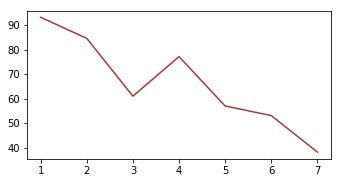

In [487]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(221)
no_comp=[1,2,3,4,5,6,7]
ax1.plot(no_comp, res, color = '#993D3D')

In [308]:
def normalize_data(x):
    mn=x.mean()
    sd=np.std(x)
    xn=(x-mn)/sd
    return xn

In [473]:
dk=normalize_data(boston_data_wo_target)

In [474]:
#Applying the same process as above to the normalised data
from sklearn import preprocessing
from sklearn.decomposition import PCA

#Creating three empty dictionaries for variance explaines, variance ratio and cumulative variance explained

var={}
var_ratio={}
cum_var={}

for p in range(33):
    v=0
    pca=PCA(n_components=p+1)
    #m = pca().fit(boston_data_wo_target
    k=pca.fit(dk)
    v=pca.explained_variance_
    var_ratio=pca.explained_variance_ratio_
    var[p+1]=np.sum(pca.explained_variance_ratio_)
#print("components:", k.components_)
print('The variance explaiained for all the components\n')
print(v)
print('\n')

print('The proportion of variance explained for all the components\n')
print(var_ratio)
print('\n')

print('The cumulative variance for all the components\n')
print(var)

The variance explaiained for all the components

[  9.31592880e+00   3.03719204e+00   2.47653693e+00   1.70487509e+00
   1.60878440e+00   1.30005434e+00   1.20663186e+00   1.14292069e+00
   1.08035248e+00   1.03538221e+00   9.92933008e-01   9.63046542e-01
   9.41057881e-01   9.04758899e-01   8.86737751e-01   7.92496058e-01
   7.70958212e-01   6.87767428e-01   5.97744364e-01   4.07260316e-01
   3.63157604e-01   2.72454090e-01   1.75675978e-01   1.36540519e-01
   7.94926550e-02   7.49595015e-02   3.59443442e-02   2.58480118e-02
   2.36063743e-02   1.18818771e-02   7.26123522e-03   3.65512023e-03
   1.44993044e-03]


The proportion of variance explained for all the components

[  2.81742966e-01   9.18542329e-02   7.48982602e-02   5.15607809e-02
   4.86546964e-02   3.93177291e-02   3.64923396e-02   3.45655138e-02
   3.26732545e-02   3.13132123e-02   3.00294148e-02   2.91255542e-02
   2.84605480e-02   2.73627527e-02   2.68177365e-02   2.39675715e-02
   2.33161994e-02   2.08002486e-02   1.80

In [476]:
#Rotate the data
dR = dk @ k.components_

In [477]:
de=pd.DataFrame(dR)

In [482]:
#Estimating the regression model
columns=[[0],[0,1],[0,1,2],[0,1,2,3],[0,1,2,3,4],[0,1,2,3,4,5],[0,1,2,3,4,5,6]]
res = list()
for i in range(0,7):
    X_train, X_test, y_train, y_test = train_test_split (de[columns[i]],boston_data_only_target, train_size = 0.75)
    model = LinearRegression(n_jobs=10,normalize=True)
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    coefficients = model.coef_
    print(compute_rmse(model,X_test,y_test))
    res.append(compute_rmse(model,X_test,y_test))

print('The accuracy of the model is', model.score(X_test,y_test))

100.971476956
101.863533234
89.0374835204
95.5394154491
43.1678094977
59.6423950732
38.5699391589
The accuracy of the model is 0.528615281812


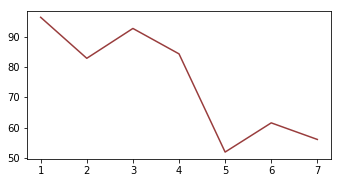

In [481]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(221)
no_comp=[1,2,3,4,5,6,7]
ax1.plot(no_comp, res, color = '#993D3D')

Out of all the models, based on accuracy, performance and speed, Normalised PCA is best of all the models. We also see that MSE is more in terms of lesser components. 1-component PCA produces a poorer prediction performance.